### Import the required libraries

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans,AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage,dendrogram,cophenet
from sklearn.metrics.pairwise import euclidean_distances

In [136]:
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [137]:
data_dict = pd.read_csv('data-dictionary.csv')

In [138]:
data_dict

Column Name                                        Description
0     country                                Name of the country
1  child_mort  Death of children under 5 years of age per 100...
2     exports  Exports of goods and services per capita. Give...
3      health  Total health spending per capita. Given as %ag...
4     imports  Imports of goods and services per capita. Give...
5      Income                              Net income per person
6   Inflation  The measurement of the annual growth rate of t...
7  life_expec  The average number of years a new born child w...
8   total_fer  The number of children that would be born to e...
9        gdpp  The GDP per capita. Calculated as the Total GD...

In [139]:
data = pd.read_csv('Country-data.csv')

In [140]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Data exploration and Data Preprocessing

In [142]:
# Let's set country as index as it is unique identifier of each row.

In [143]:
data.set_index('country',inplace=True)

<AxesSubplot:>

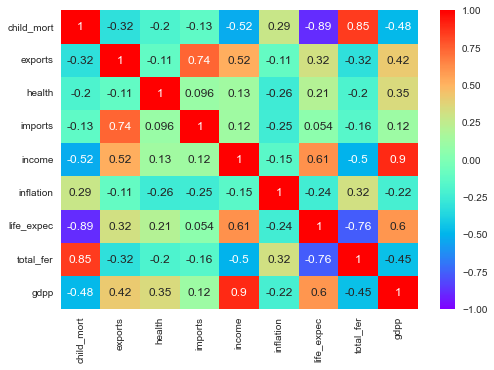

In [144]:
# Let's look at the co-relation
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True,cmap='rainbow')

In [145]:
#### INFERENCES:

In [146]:
# Lets check for null values and outliers

In [147]:
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [148]:
# Check for outliers

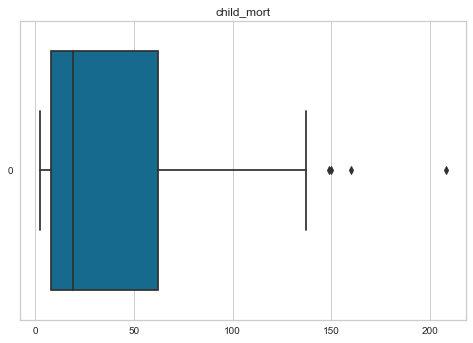

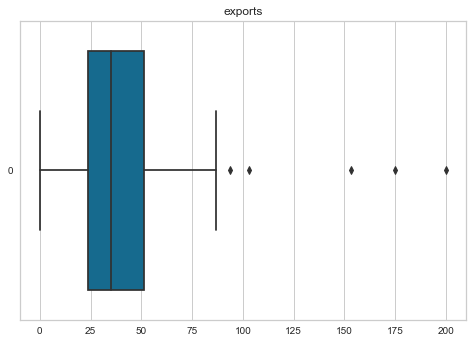

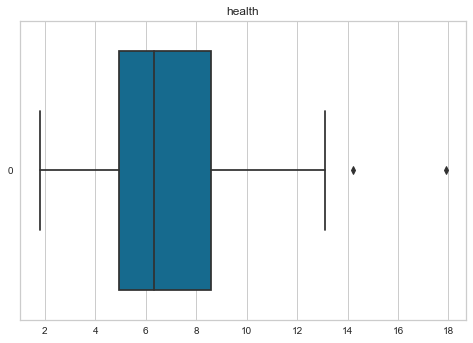

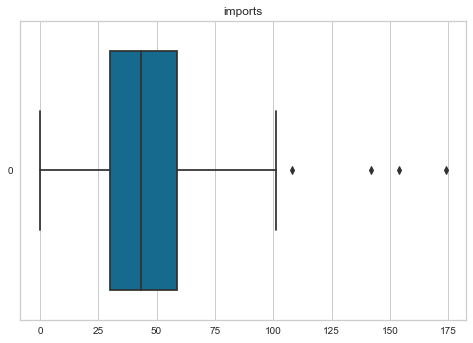

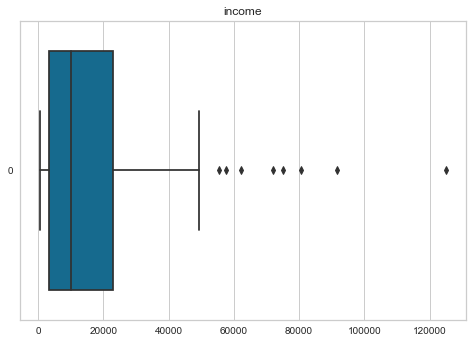

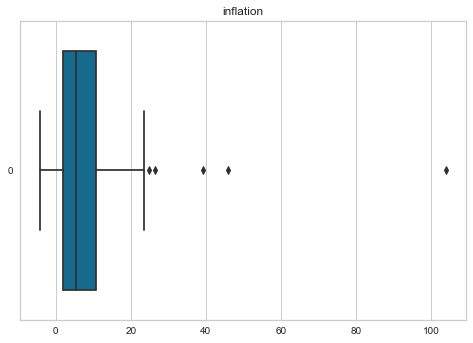

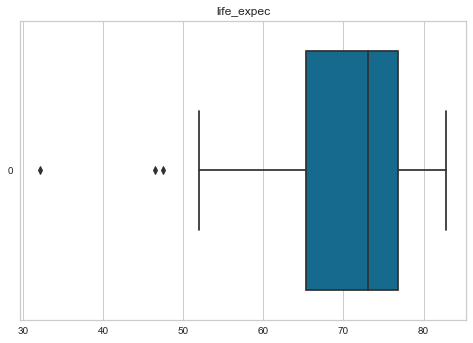

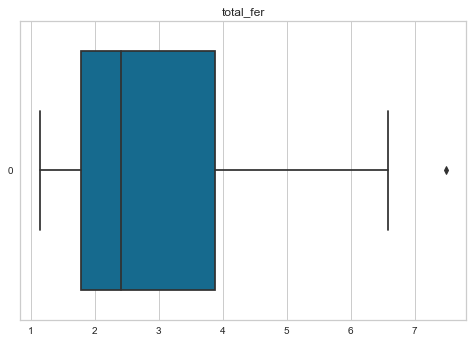

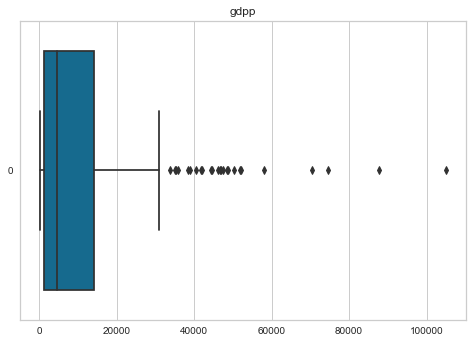

In [149]:
for i in data.columns:
    plt.title(i)
    sns.boxplot(data[i],orient='h')
    plt.show()

In [150]:
# We have extreme outliers in income,inflation and GDP.

In [151]:
data.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [152]:
for i in ['income', 'inflation','gdpp']:
    q1,q3=np.quantile(data[i],[0.25,0.75])
    iqr = q3 - q1
    ul,ll = q3+2.5*iqr,q1-2.5*iqr
    data[i] = np.where(data[i]>ul,ul,data[i])
    data[i] = np.where(data[i]<ll,ll,data[i])

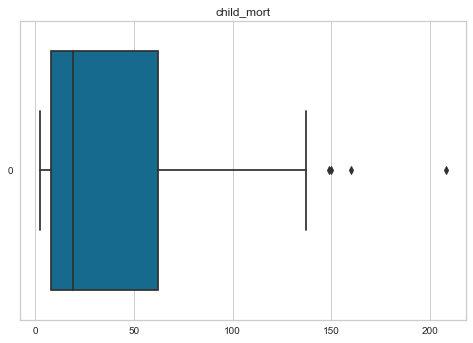

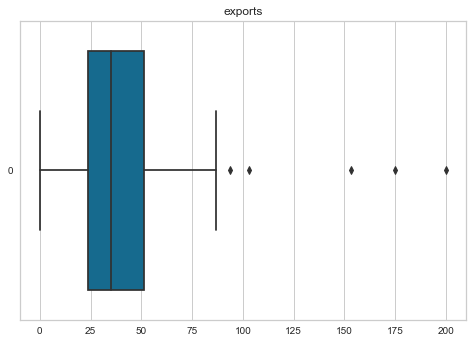

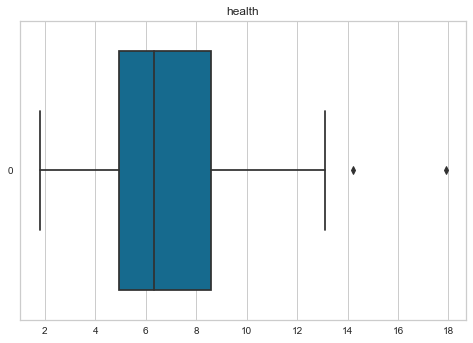

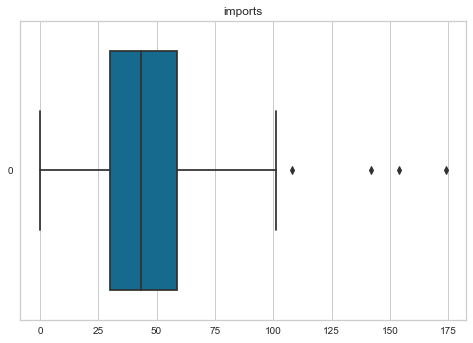

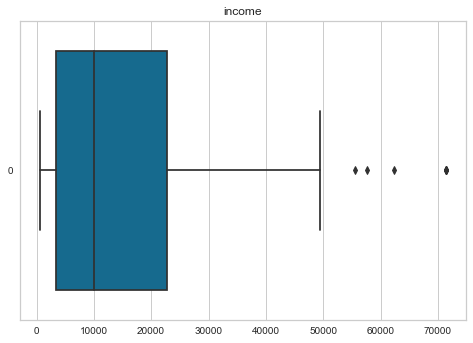

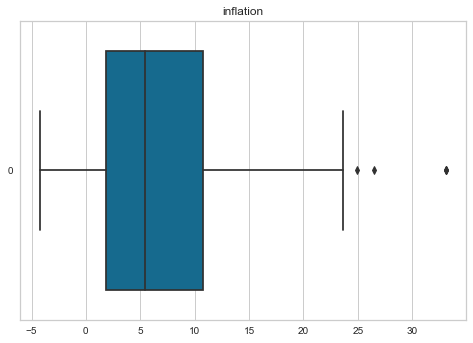

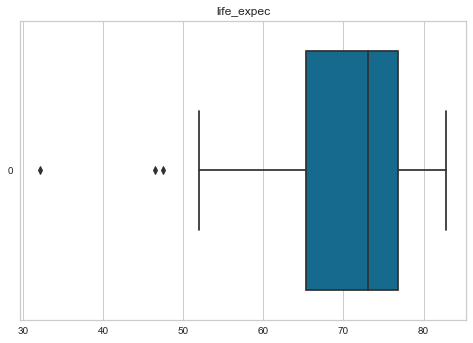

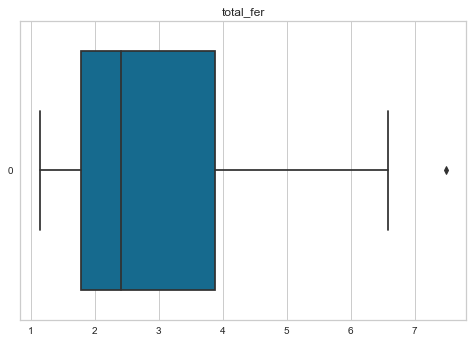

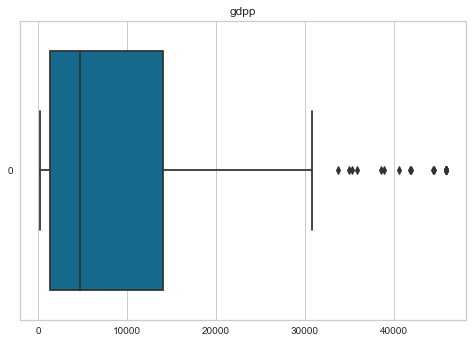

In [153]:
for i in data.columns:
    plt.title(i)
    sns.boxplot(data[i],orient='h')
    plt.show()

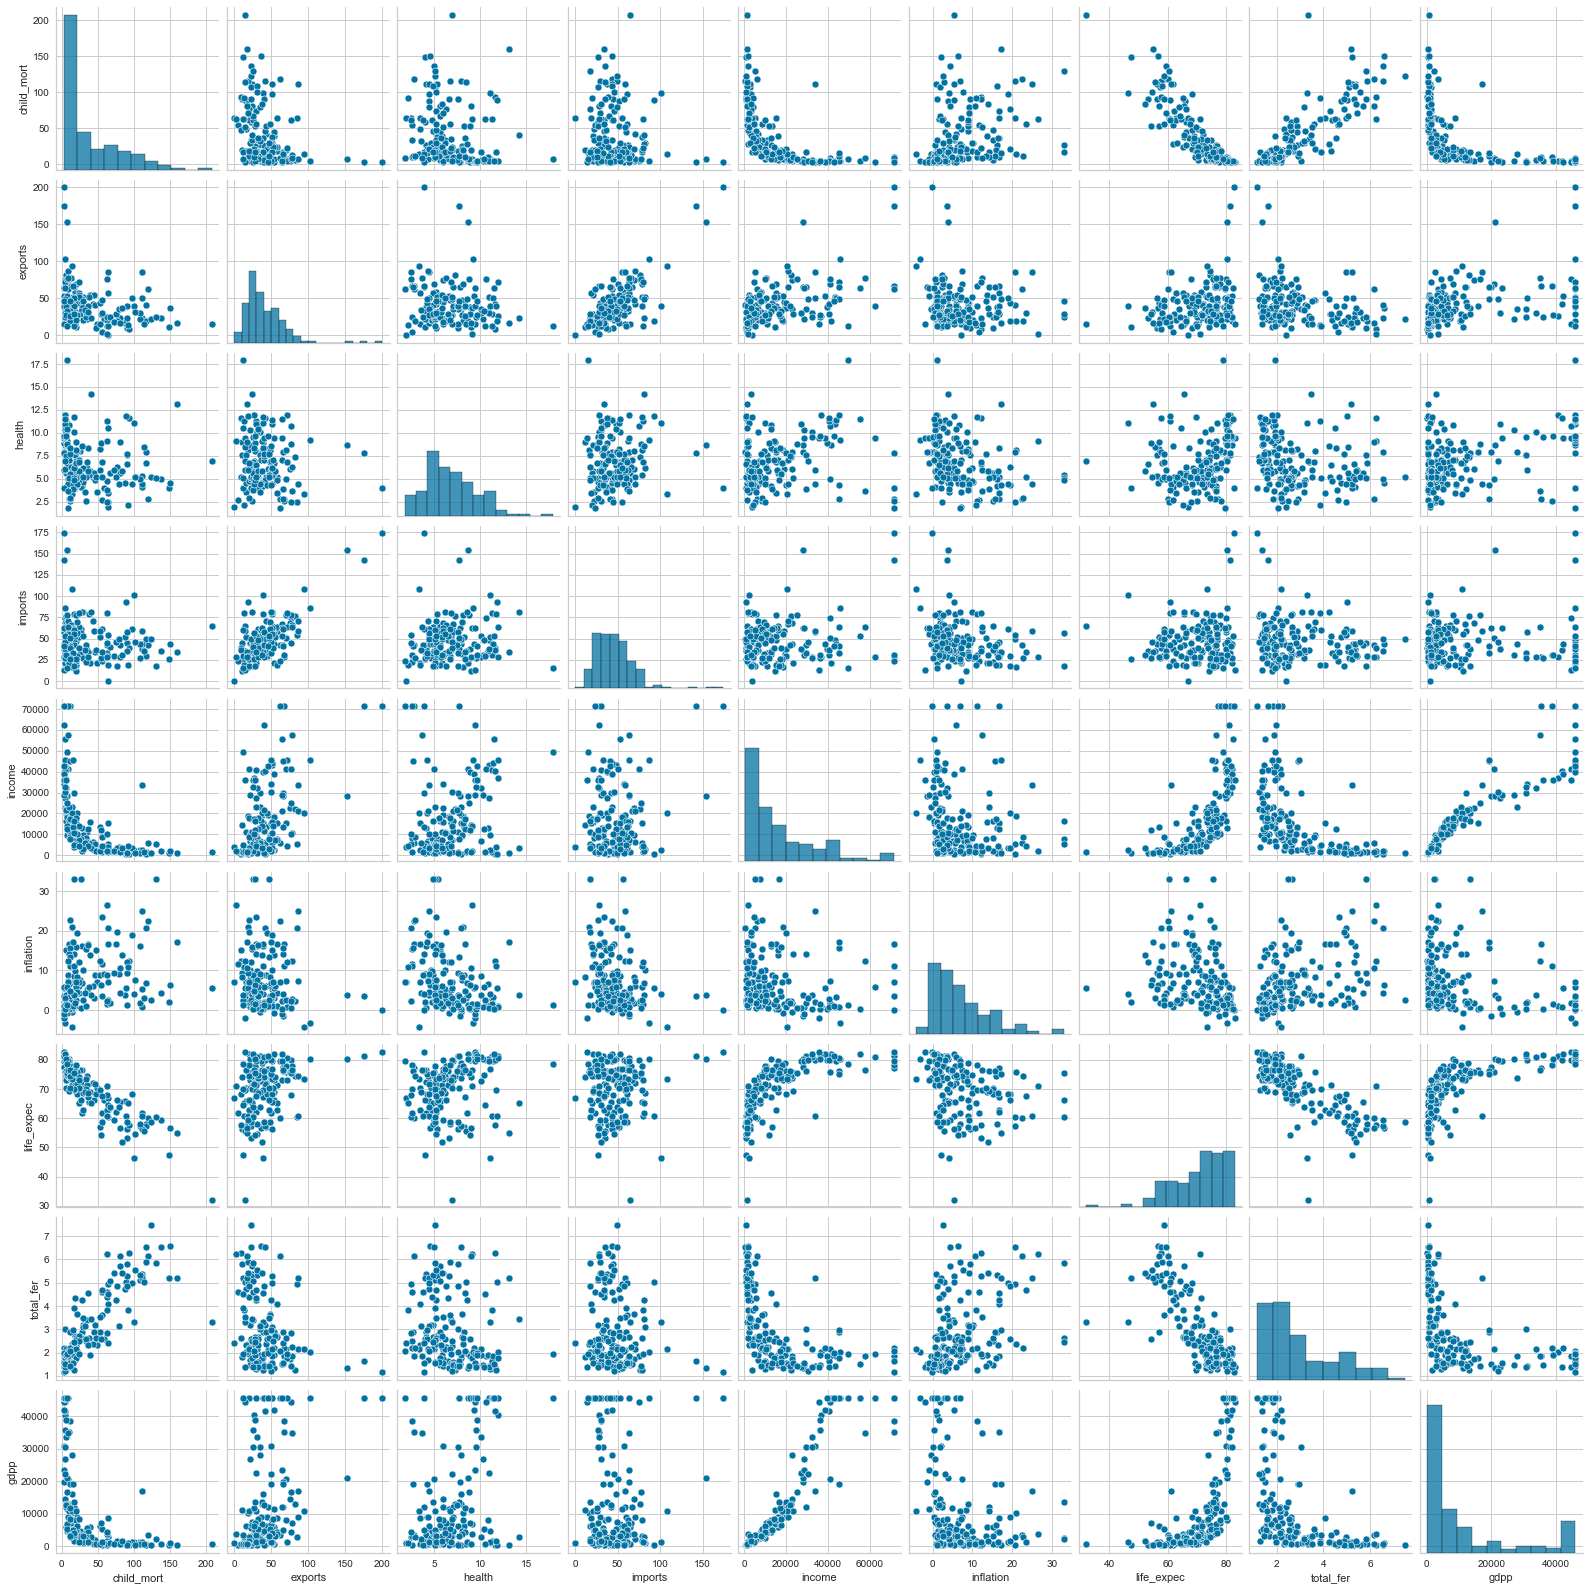

In [154]:
sns.pairplot(data)
plt.show()

### Lets apply PCA on the data to reduce the dimension

In [155]:
# Step1 : Standardize
sc = StandardScaler()

In [156]:
data_s = pd.DataFrame(sc.fit_transform(data),columns=data.columns,index=data.index)

In [157]:
data_s

child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.291532 -1.138280  0.279088 -0.082455 -0.878427   
Albania               -0.538949 -0.479658 -0.097016  0.070837 -0.391534   
Algeria               -0.272833 -0.099122 -0.966073 -0.641762 -0.217727   
Angola                 2.007808  0.775381 -1.448071 -0.165315 -0.627373   
Antigua and Barbuda   -0.695634  0.160668 -0.286894  0.497568  0.145102   
...                         ...       ...       ...       ...       ...   
Vanuatu               -0.225578  0.200917 -0.571711  0.240700 -0.800009   
Venezuela             -0.526514 -0.461363 -0.695862 -1.213499 -0.007052   
Vietnam               -0.372315  1.130305  0.008877  1.380030 -0.709887   
Yemen                  0.448417 -0.406478 -0.597272 -0.517472 -0.710472   
Zambia                 1.114951 -0.150348 -0.338015 -0.662477 -0.780697   

                     inflation  life_expec  total_fer      gdpp  
country                                                          
Afghanistan           0.303790   -1.619092   1.902882 -0.767399  
Albania              -0.381016    0.647866  -0.859973 -0.526335  
Algeria               1.225166    0.670423  -0.038404 -0.501118  
Angola                2.096738   -1.179234   2.128151 -0.564502  
Antigua and Barbuda  -0.802968    0.704258  -0.541946  0.026399  
...                        ...         ...        ...       ...  
Vanuatu              -0.639721   -0.852161   0.365754 -0.602669  
Venezuela             3.577027    0.546361  -0.316678  0.115000  
Vietnam               0.671787    0.286958  -0.661206 -0.715806  
Yemen                 2.262752   -0.344633   1.140944 -0.715806  
Zambia                0.934642   -2.092785   1.624609 -0.705582  

[167 rows x 9 columns]

In [158]:
pca = PCA(n_components = 9)

In [159]:
data_pca = pca.fit_transform(data_s)

In [160]:
data_pca = pd.DataFrame(data_pca,columns=data.columns,index=data.index)

In [161]:
# Kaiser's criterion
pca.explained_variance_

array([4.31207333, 1.56974591, 1.19878755, 0.92471919, 0.5956137 ,
       0.22264376, 0.10396867, 0.0834602 , 0.04320456])

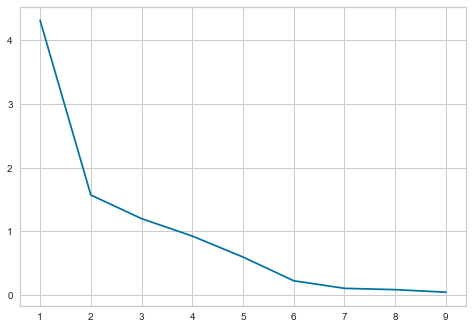

In [162]:
# Scree plot
plt.plot(range(1,10),pca.explained_variance_)
plt.show()

In [163]:
# Total explained variance
np.cumsum(pca.explained_variance_ratio_)

array([0.47625028, 0.64962209, 0.78202311, 0.88415443, 0.94993745,
       0.97452751, 0.98601041, 0.99522824, 1.        ])

In [164]:
# Let's reduce it to 5 dimension (it will have 95% of the data)
pca_final = PCA(n_components=5)

In [165]:
data_pca = pca_final.fit_transform(data_s)

In [166]:
data_pca = pd.DataFrame(data_final,columns=range(1,6),index=data.index)

In [167]:
data_pca

1         2         3         4         5
country                                                              
Afghanistan         -2.976983 -0.032841 -0.932610  0.789299  0.002730
Albania              0.420479 -0.456931 -0.080523 -1.318985  0.111028
Algeria             -0.423936 -0.407533  1.658485 -0.478689  0.389953
Angola              -3.167254  1.504973  1.630109  1.526512  0.096293
Antigua and Barbuda  1.116417  0.224792 -0.116042 -0.862830 -0.369262
...                       ...       ...       ...       ...       ...
Vanuatu             -0.841494  0.680450 -0.332940 -0.797223 -0.510282
Venezuela           -0.579641 -1.253703  3.079860  0.484351  1.943542
Vietnam              0.327842  1.533762  0.231331 -1.004264  1.288335
Yemen               -2.136859 -0.163968  1.500716  0.450588  1.107161
Zambia              -2.989555  0.343467  0.158097  0.953086 -0.012743

[167 rows x 5 columns]

### K-Means Clustering

In [168]:
# Lets make an elbow plot

k_elbow = KElbowVisualizer(KMeans(),k=10)

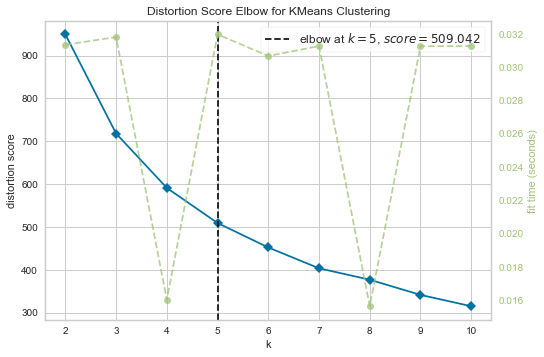

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [169]:
k_elbow.fit(data_pca)
k_elbow.show()

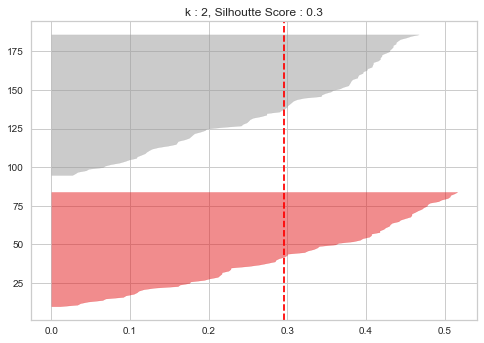

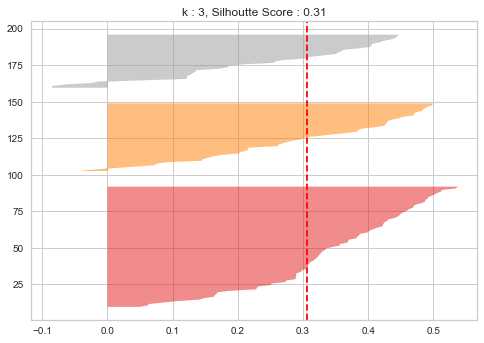

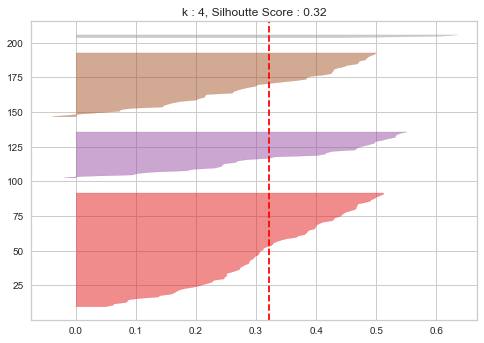

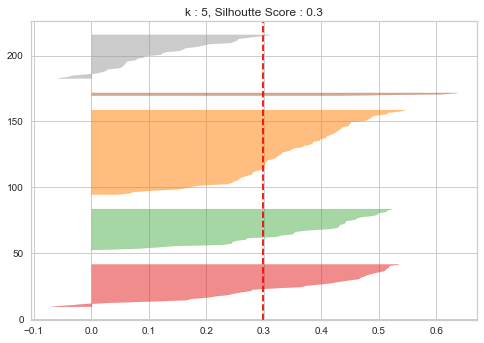

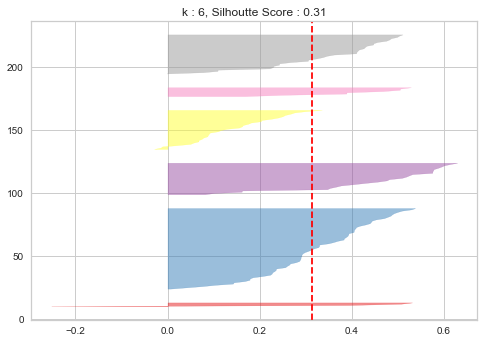

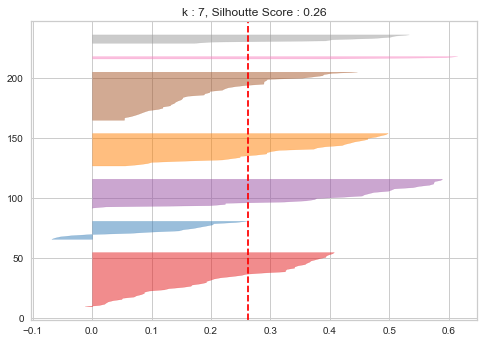

In [170]:
# Finding k using silhoutte visualizer
for i in range(2,8):
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(data_pca)
    plt.title(f'k : {i}, Silhoutte Score : {round(sil_viz.silhouette_score_,2)}')
    plt.show()

#### INFERENCE:

- If k>4, we can see some very small clusters are forming. Hence we should go either 2 or 3 clusters.
- If we go with 2 clusters there are minm outliers, while with 3 clusters although silhoutte scores increases there are slightly more outliers.

In [171]:
# Let's go with k=2
final_kmean = KMeans(n_clusters=3)

In [172]:
kmean_pred = final_kmean.fit_predict(data_pca)

In [173]:
kmean_pred

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [174]:
### Business interpretations

In [175]:
data['Kmean_label'] = kmean_pred

In [176]:
data.head(3)

child_mort  exports  health  imports   income  inflation  \
country                                                                 
Afghanistan        90.2     10.0    7.58     44.9   1610.0       9.44   
Albania            16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria            27.3     38.4    4.17     31.4  12900.0      16.10   

             life_expec  total_fer    gdpp  Kmean_label  
country                                                  
Afghanistan        56.2       5.82   553.0            2  
Albania            76.3       1.65  4090.0            0  
Algeria            76.5       2.89  4460.0            0

In [177]:
data['Kmean_label'].value_counts()

0    83
2    47
1    37
Name: Kmean_label, dtype: int64

In [178]:
data.groupby(by='Kmean_label').mean()

child_mort    exports    health    imports        income  \
Kmean_label                                                             
0             22.025301  40.307096  6.180602  47.518866  12177.951807   
1              5.237838  58.097297  8.782973  51.281081  42690.878378   
2             92.961702  29.151277  6.388511  42.323404   3942.404255   

             inflation  life_expec  total_fer          gdpp  
Kmean_label                                                  
0             7.469506   72.802410   2.312892   6227.253012  
1             2.588432   79.956757   1.755676  36905.405405  
2            10.511170   59.187234   5.008085   1922.382979

In [179]:
silhouette_score(data_pca,kmean_pred)

0.30679770512833193

In [180]:
# Visualize these clusters

In [181]:
centroids = final_kmean.cluster_centers_

In [182]:
centroids

array([[ 0.135945  , -0.05639663,  0.24693038, -0.74951387,  0.1648213 ],
       [ 2.854884  , -0.26212462, -0.17395163,  0.84526724, -0.23278656],
       [-2.48753496,  0.30594747, -0.29912789,  0.65818645, -0.10780991]])

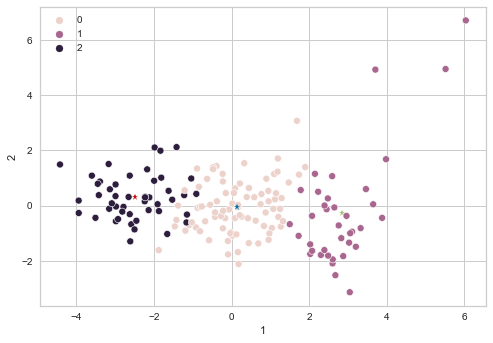

In [187]:
sns.scatterplot(x=data_pca[1],y=data_pca[2],hue=kmean_pred)
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='*')

### Aggloromative clustering

In [188]:
# Distance metrix
dist_matrix = euclidean_distances(data_pca)

In [189]:
dist_matrix.shape

(167, 167)

In [190]:
link_matrix = linkage(dist_matrix,method='ward')

In [192]:
link_matrix[:10,:]

array([[ 41.        , 121.        ,   1.32413918,   2.        ],
       [ 50.        , 116.        ,   1.43949751,   2.        ],
       [ 34.        , 119.        ,   1.72602078,   2.        ],
       [  8.        ,  44.        ,   1.72608538,   2.        ],
       [ 75.        , 158.        ,   1.76310541,   2.        ],
       [ 17.        ,  28.        ,   1.97336634,   2.        ],
       [  4.        ,  24.        ,   2.16534337,   2.        ],
       [ 18.        ,  52.        ,   2.18147315,   2.        ],
       [ 48.        ,  61.        ,   2.20130579,   2.        ],
       [ 63.        , 166.        ,   2.23603046,   2.        ]])

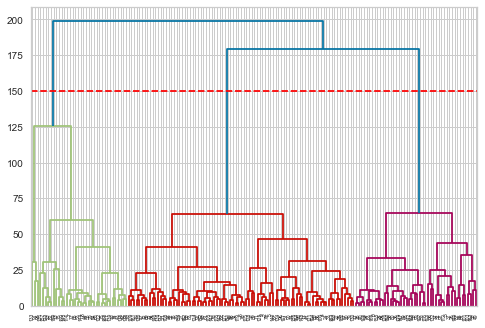

In [195]:
dendrogram(link_matrix)
plt.axhline(y=150,color='red',ls='--')
plt.show()

In [196]:
# let's take k=3

In [198]:
final_agglo = AgglomerativeClustering(n_clusters=3)

In [199]:
agglo_pred = final_agglo.fit_predict(data_pca)

In [200]:
silhouette_score(data_pca,agglo_pred)

0.2598001326809029

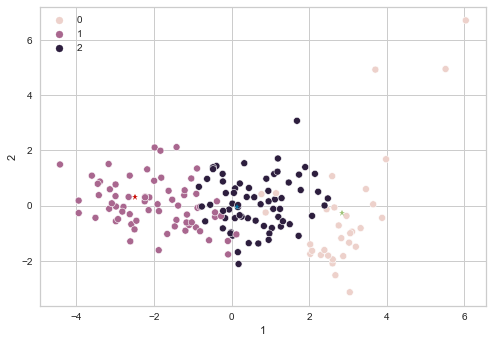

In [201]:
sns.scatterplot(x=data_pca[1],y=data_pca[2],hue=agglo_pred)
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='*')

#### INFERENCES:
- Since Kmeans has better silhoutte score,which can also seen in the scatter plot (Aggloromative clustering has more overlapping datapoints).We can go with kmeans clustering with k =3 as finalmodel.

### Business Interpretation

In [203]:
data.groupby(by='Kmean_label').mean()

child_mort    exports    health    imports        income  \
Kmean_label                                                             
0             22.025301  40.307096  6.180602  47.518866  12177.951807   
1              5.237838  58.097297  8.782973  51.281081  42690.878378   
2             92.961702  29.151277  6.388511  42.323404   3942.404255   

             inflation  life_expec  total_fer          gdpp  
Kmean_label                                                  
0             7.469506   72.802410   2.312892   6227.253012  
1             2.588432   79.956757   1.755676  36905.405405  
2            10.511170   59.187234   5.008085   1922.382979

In [205]:
data['Kmean_label']=data['Kmean_label'].map({0:'Developing',1:'Developed',2:'Underdevelop'})

In [206]:
data.head(3)

child_mort  exports  health  imports   income  inflation  \
country                                                                 
Afghanistan        90.2     10.0    7.58     44.9   1610.0       9.44   
Albania            16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria            27.3     38.4    4.17     31.4  12900.0      16.10   

             life_expec  total_fer    gdpp   Kmean_label  
country                                                   
Afghanistan        56.2       5.82   553.0  Underdevelop  
Albania            76.3       1.65  4090.0    Developing  
Algeria            76.5       2.89  4460.0    Developing

In [210]:
# Developed countries
for i in data[data['Kmean_label']=='Developed'].index:
    print(i,end=',')

Australia,Austria,Bahamas,Bahrain,Belgium,Brunei,Canada,Cyprus,Czech Republic,Denmark,Finland,France,Germany,Greece,Iceland,Ireland,Israel,Italy,Japan,Kuwait,Luxembourg,Malta,Netherlands,New Zealand,Norway,Portugal,Qatar,Singapore,Slovak Republic,Slovenia,South Korea,Spain,Sweden,Switzerland,United Arab Emirates,United Kingdom,United States,

In [211]:
# Developing countries
for i in data[data['Kmean_label']=='Developing'].index:
    print(i,end=',')

Albania,Algeria,Antigua and Barbuda,Argentina,Armenia,Azerbaijan,Bangladesh,Barbados,Belarus,Belize,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Bulgaria,Cambodia,Cape Verde,Chile,China,Colombia,Costa Rica,Croatia,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Fiji,Georgia,Grenada,Guatemala,Guyana,Hungary,India,Indonesia,Iran,Jamaica,Jordan,Kazakhstan,Kyrgyz Republic,Latvia,Lebanon,Libya,Lithuania,Macedonia, FYR,Malaysia,Maldives,Mauritius,Micronesia, Fed. Sts.,Moldova,Mongolia,Montenegro,Morocco,Myanmar,Nepal,Oman,Panama,Paraguay,Peru,Philippines,Poland,Romania,Russia,Samoa,Saudi Arabia,Serbia,Seychelles,Solomon Islands,Sri Lanka,St. Vincent and the Grenadines,Suriname,Tajikistan,Thailand,Tonga,Tunisia,Turkey,Turkmenistan,Ukraine,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,

In [212]:
# Under develop countries
for i in data[data['Kmean_label']=='Underdevelop'].index:
    print(i,end=',')

Afghanistan,Angola,Benin,Botswana,Burkina Faso,Burundi,Cameroon,Central African Republic,Chad,Comoros,Congo, Dem. Rep.,Congo, Rep.,Cote d'Ivoire,Equatorial Guinea,Eritrea,Gabon,Gambia,Ghana,Guinea,Guinea-Bissau,Haiti,Iraq,Kenya,Kiribati,Lao,Lesotho,Liberia,Madagascar,Malawi,Mali,Mauritania,Mozambique,Namibia,Niger,Nigeria,Pakistan,Rwanda,Senegal,Sierra Leone,South Africa,Sudan,Tanzania,Timor-Leste,Togo,Uganda,Yemen,Zambia,

### World MAP

In [213]:
import plotly.express as px

In [218]:
df = pd.DataFrame({'country':data.index,'label':data['Kmean_label']})

In [221]:
fig = px.choropleth(df,
                   locationmode='country names',
                   locations = 'country',
                   color = df['label'],
                   color_discrete_map = {'Developed':'green',
                                        'Developing':'blue',
                                        'Underdevelop':'red'})
fig.show()